# 👀 다층 퍼셉트론 (MLP)
### 변경점
* **변경점** : **`cifar10`**에서 **`fashsion_mnist`** 데이터를 변경 후 모델 설계 및 훈련을 진행해 보았습니다.

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/rickiepark/Generative_Deep_Learning_2nd_Edition/blob/main/notebooks/02_deeplearning/01_mlp/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

이 노트북에서는 CIFAR 데이터셋에서 다층 퍼셉트론을 훈련합니다.

In [1]:
import sys

# 코랩의 경우 깃허브 저장소로부터 utils.py를 다운로드 합니다.
if 'google.colab' in sys.modules:
    !wget https://raw.githubusercontent.com/rickiepark/Generative_Deep_Learning_2nd_Edition/main/notebooks/utils.py
    !mkdir -p notebooks
    !mv utils.py notebooks

--2024-01-10 16:24:14--  https://raw.githubusercontent.com/rickiepark/Generative_Deep_Learning_2nd_Edition/main/notebooks/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 771 [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]     771  --.-KB/s    in 0s      

2024-01-10 16:24:14 (42.8 MB/s) - ‘utils.py’ saved [771/771]



In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
from notebooks.utils import display

## 0. 파라미터 <a name="parameters"></a>

In [3]:
NUM_CLASSES = 10

## 1. 데이터 준비 <a name="prepare"></a>

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
type(x_train), x_train.dtype

(numpy.ndarray, dtype('uint8'))

In [7]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

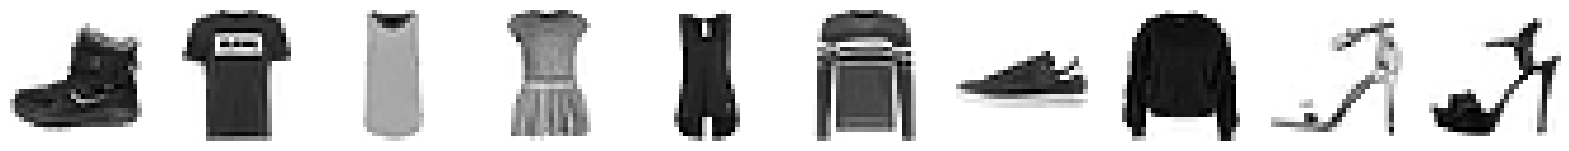

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [8]:
display(x_train[:10])
print(y_train[:10])

## 2. 모델 구축 <a name="build"></a>

In [9]:
type(layers.Flatten())

keras.src.layers.reshaping.flatten.Flatten

In [10]:
# model 1 : using Batch normalization
input_layer = layers.Input((28, 28)) #-> (None, 28,28)

x = layers.Flatten()(input_layer) # -> (None, 784)
x = layers.BatchNormalization()(x)
x = layers.Dense(200, activation="relu")(x) # -> (None, 200)
x = layers.BatchNormalization()(x)
x = layers.Dense(150, activation="relu")(x) # -> (None, 150)
x = layers.BatchNormalization()(x)

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x) # -> (None, 10)

model1 = models.Model(input_layer, output_layer)

model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 batch_normalization_1 (Bat  (None, 200)               800       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 150)               30150 

In [11]:
# model 2 : using Dropout
input_layer = layers.Input((28, 28)) #-> (None, 28,28)

x = layers.Flatten()(input_layer) # -> (None, 784)
x = layers.Dropout(0.2)(x)
x = layers.Dense(200, activation="relu")(x) # -> (None, 200)
x = layers.Dense(150, activation="relu")(x) # -> (None, 150)


output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x) # -> (None, 10)

model2 = models.Model(input_layer, output_layer)
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 200)               157000    
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 188660 (736.95 KB)
Trainable params: 188660 (

## 3. 모델 훈련 <a name="train"></a>

In [12]:
opt = optimizers.Adam(learning_rate=0.0005)
model2.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [13]:
model2.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.5357 - accuracy: 0.8095
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4034 - accuracy: 0.8520
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3672 - accuracy: 0.8648
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3486 - accuracy: 0.8709
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3316 - accuracy: 0.8771
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3186 - accuracy: 0.8805
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3052 - accuracy: 0.8868
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2947 - accuracy: 0.8885
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2878 - accuracy: 0.8917
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.27

## 4. 평가 <a name="evaluate"></a>

In [14]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3255 - accuracy: 0.8836


[0.32551440596580505, 0.8835999965667725]

In [28]:
CLASSES = np.array(
    [
        "T-shirt/top",
        "Trouser",
        "Pullover",
        "Dress",
        "Coat",
        "Sandal",
        "Shirt",
        "Sneaker",
        "Bag",
        "Ankle boot",
    ]
)

preds = model2.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 2ms/step


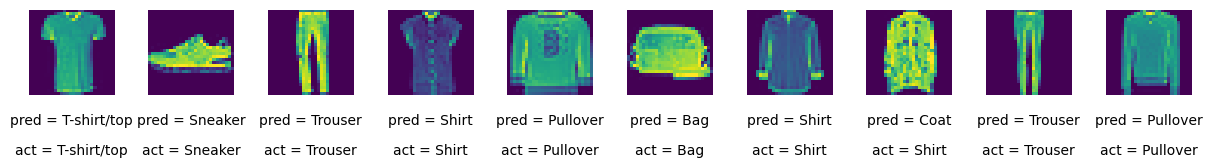

In [19]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)

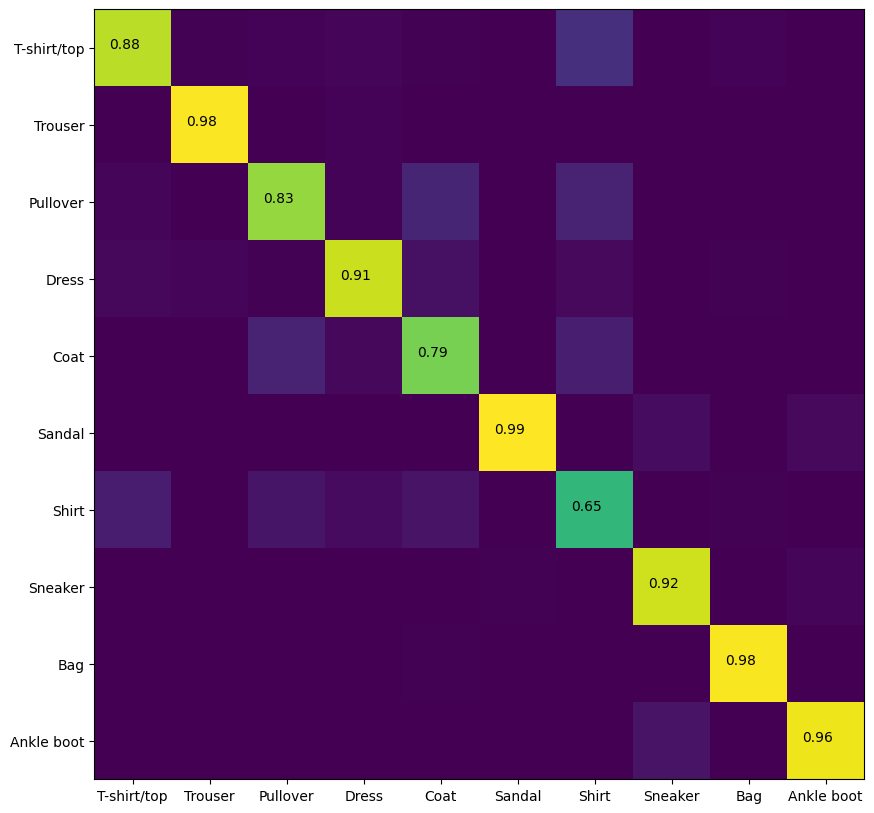

In [50]:
# 혼잡행렬 확인
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_true=np.argmax(y_test, axis=-1), y_pred=np.argmax(preds, axis=-1), normalize='pred')

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(con_matrix)
ax.set_xticks(np.arange(len(CLASSES)))
ax.set_xticklabels(CLASSES)
ax.set_yticks(np.arange(len(CLASSES)))
ax.set_yticklabels(CLASSES)
for i in range(len(CLASSES)):
  ax.text(-0.3+i,i, str(round(con_matrix[i,i],2)),fontsize=10, color='k')